In [2]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt


In [3]:
data= pd.read_csv('tesla.csv')
data.head(5)
# data.keys()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
data.shape

(1692, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


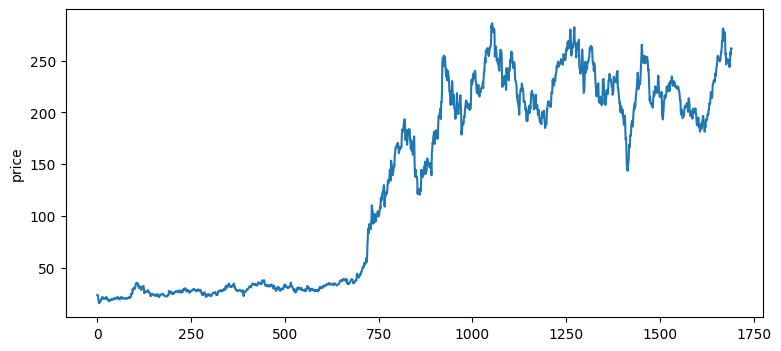

In [11]:
plt.figure(figsize=(9,4))
plt.plot(data['Close'])
plt.ylabel('price')
plt.show()

In [12]:
# x=data.drop(['close'], axis=1)
# y=data['close']

In [13]:
# data['open-close']= data['open'] -data['close']
# data['high - low'] =data['high'] - data['low']
# data.dropna()

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# Load dataset
df = pd.read_csv("tesla.csv")

# Handle missing data
df['Close'] = df['Close'].fillna(df['Close'].mean())

# Create target column (next day's Close)
df['Target'] = df['Close'].shift(-1)
df = df[:-1]  

# Features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
X = df[features].values
y = df['Target'].values

# Step 1: Standardize features (mean=0, std=1)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # prevent division by zero
X_norm = (X - X_mean) / X_std

# Step 2: Calculate covariance matrix
cov_matrix = np.cov(X_norm, rowvar=False)

# Step 3: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvectors by eigenvalues descending
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_index]
sorted_eigenvalues = eigenvalues[sorted_index]

# Step 5: Select top k components (e.g., k=2)
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]

# Step 6: Transform data
X_pca = np.dot(X_norm, eigenvector_subset)

# Train-test split (80-20)
split = int(0.8 * len(X_pca))
X_train, X_test = X_pca[:split], X_pca[split:]
y_train, y_test = y[:split], y[split:]

# Manual KNN Regression function
def knn_regression(X_train, y_train, X_test_point, k=5):
    distances = [np.linalg.norm(X_train[i] - X_test_point) for i in range(len(X_train))]
    k_indices = np.argsort(distances)[:k]
    k_targets = [y_train[i] for i in k_indices]
    return np.mean(k_targets)

# Predict on test set
y_pred = [knn_regression(X_train, y_train, x, k=5) for x in X_test]

# Evaluate regression
def evaluate_regression(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    mae = np.mean(np.abs(y_true - y_pred))
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    ss_res = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    return mse, mae, r2

mse, mae, r2 = evaluate_regression(y_test, np.array(y_pred))

print(f"KNN Regression with PCA Results:\nMSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")
X_pca 


KNN Regression with PCA Results:
MSE: 43.68, MAE: 5.03, R2: 0.93


array([[ 1.84668908,  3.85394954],
       [ 1.84178601,  3.47673481],
       [ 2.34011741,  1.4486207 ],
       ...,
       [-2.96654872,  0.14451283],
       [-2.91186089, -0.50133425],
       [-3.15245194, -0.00958987]])

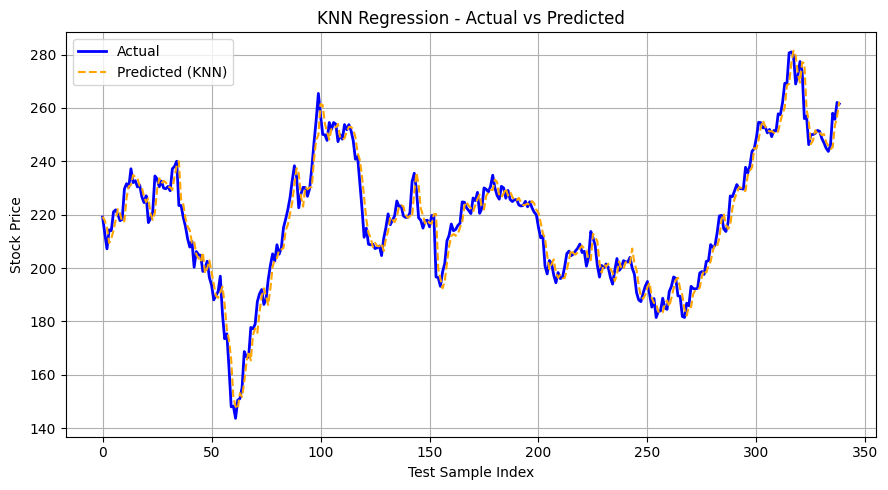

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicted (KNN)', color='orange', linestyle='--')
plt.xlabel('Test Sample Index')
plt.ylabel('Stock Price')
plt.title('KNN Regression - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
